# Определение перспективного тарифа для телеком компании

Чтобы скорректировать рекламный бюджет, необходимо понять, какой тариф приносит больше денег.

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Задачи проекта:
 
 - Посмотреть как клиенты пользуются услугами сотового оператора:  сколько звонков, интернет трафика и сообщений требуется помесячно;
 - Выслить ежемесячную выручку с клиентов;
 - Посмотреть, как отличается пользование тарифом Smart от пользования тарифа Ultra;
 - Проверить гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается";
 - Проверить гипотезу: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
 - Выявить какой тариф более выгоден для компании.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import seaborn as sns
from functools import reduce

In [2]:
#откроем таблицу для звонков и выведем её на экран
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
# посмотрим основные числовые характеристики для data_calls
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
# посмотрим основную информацию по таблицу data_calls
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
#откроем таблицу для интернета и выведем её на экран
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# посмотрим основные числовые характеристики для data_internet
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [7]:
# посмотрим основную информацию по таблицу data_internet
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
#откроем таблицу для сообщений и выведем её на экран
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
# посмотрим основную информацию по таблицу data_messages
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
#откроем таблицу тарифов и выведем её на экран
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
#откроем таблицу клиентов и выведем её на экран
data_users = pd.read_csv('/datasets/users.csv')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
# посмотрим сколько у нас клиентов с разными тарифами
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [13]:
# посмотрим основную информацию по таблицу data_users
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Рассмотрим наши таблице. 

В таблице data_calls, показывающей количество звонков для того или иного клиента, есть следующие стобцы
 -	id — уникальный номер звонка
 -	call_date — дата звонка
 -	duration — длительность звонка в минутах
 -	user_id — идентификатор пользователя, сделавшего звонок

Нет ни одного пропущенного значения
Среднее время звонка 6 минут, медианное приближается к 7.

В таблице data_internet, показывается количество потраченного интернета за ту или иную сессию для каждого клиента.
 -	id — уникальный номер сессии
 -	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 -	session_date — дата интернет-сессии
 -	user_id — идентификатор пользователя

Нет ни одного пропущенного значения
Средний трафик за одну сессию 370 мегабайт, медианное около к 350.
Данное распределение говорит, что есть выбросы более долгих сессий по мегабайтам.

В таблице data_messages, содержится информация о дате отправке смс тем или иным пользователем
 -	id — уникальный номер сообщения
 -	message_date — дата сообщения
 -	user_id — идентификатор пользователя, отправившего сообщение

В таблице нет ни одного пропущенного

В таблице data_users содержится информация о клиентах
 -	user_id — уникальный идентификатор пользователя
 -	first_name — имя пользователя
 -	last_name — фамилия пользователя
 -	age — возраст пользователя (годы)
 -	reg_date — дата подключения тарифа (день, месяц, год)
 -	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 -	city — город проживания пользователя
 -	tariff — название тарифного плана

Всего у нас 500 клиентов, пропущенные значения есть только по столбцу churn_date, где указано сколько клиентов в определённый момент отказались от тарифа.

В таблице data_tariffs у нас информация о тарифах

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
  -	минута разговора: 3 рубля
  -	сообщение: 3 рубля
  -	1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
  -	минута разговора: 1 рубль
  -	сообщение: 1 рубль
  -	1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Всего у нас 351 клиент с тарифом Smart и 149 клиентов с тарифом Ultra.

## Шаг 2. Подготовка данных

Начнём с обработки таблицы data_calls.

Проверим таблицу на дубликаты.

Нулевые значения это скорее всего пропущенные звонки.
Нулевые значения влияют на медиану и на среднее, поэтому нулевые значения мы удалим, и тогда они никак не повлияют на расчёты. И 0 звонки не оплачиваются, так что и на стоимость это не повлияет.

 - Округлим значение минут до целых с округлением ввверх, так как если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута;
 - Изменим тип данных столбца с датой и заменим всю дату только на номер месяца;
 - Посчитаем количество исходящих звонков и минут для каждого клиента по месяцам.

In [14]:
# Проверим таблицу на наличие дубликатов с помощью метода duplicated()
print('В таблице data_calls', data_calls.duplicated().sum(), 'пропусков')

В таблице data_calls 0 пропусков


In [15]:
# Округлим количество минут до целых в большую сторону.
data_calls['duration'] = np.ceil(data_calls['duration'])

# удалим все пропущенные звонки
data_calls.drop(data_calls.loc[data_calls['duration']==0].index, inplace=True)

# Посмотрим как изменились числовые характеристики
data_calls.describe()

,duration,user_id
count,162994.000000,162994.000000
mean,8.897880,1254.149877
std,5.353761,144.751050
min,1.000000,1000.000000
25%,5.000000,1126.000000
50%,8.000000,1261.000000
75%,12.000000,1379.000000
max,38.000000,1499.000000


Ранее среднее время звонка составляло 6 минут, медианное приближалось к 7.
После преобразование среднее время состовляет 8,9 минуты звонка а медианное равно 8.

In [16]:
# Приведем столбец call_date к типу данных даты
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'],
format='%Y.%m.%d')

# И оставим только месяц, так как выборка у нас за один год.
data_calls['call_date']=data_calls['call_date'].dt.month

# Сгрупируем таблицу так, чтобы было указано количество звонков и сумма исходящих звонков по месяцам для каждого клиента
# Также переменуем некоторые столбцы для удобства
user_calls = data_calls.groupby(['user_id', 'call_date'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={"id": "amount_calls", 'call_date': 'month', 'duration':'duration_calls'})

Теперь обработаем таблицу с интернетом:

Проверим таблицу на дубликаты.

Нулевые значения возможно ошибочные данные.
Нулевые значения влияют на медиану и на среднее, поэтому нулевые значения мы удалим, и тогда они никак не повлияют на расчёты.

 - Округлим значение мегабайт до целых с округлением ввверх, так как если пользователь использовал всего 1 мегабайт, в тарифе "открывается" новый гигабайт;
 - Изменим тип данных столбца с датой и заменим всю дату только на номер месяца;
 - Посчитаем количество используемого интернета для каждого клиента по месяцам.

In [17]:
# Проверим таблицу на наличие дубликатов с помощью метода duplicated()
print('В таблице data_internet', data_internet.duplicated().sum(), 'пропусков')

В таблице data_internet 0 пропусков


In [18]:
# Создадим новую таблицу на основании имеющейся, но без значений 0 в столбце mb_used
data_internet  = data_internet[data_internet['mb_used'] != 0]

# Посмотрим как изменились числовые характеристики
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,129798.000000,129798.000000,129798.000000
mean,74978.644879,426.087210,1253.046318
std,43047.137838,255.596447,143.782672
min,0.000000,0.030000,1000.000000
25%,37675.250000,227.460000,1132.000000
50%,75253.000000,400.540000,1252.000000
75%,112247.750000,592.947500,1380.000000
max,149395.000000,1724.830000,1499.000000


Ранее средний размер интернет сессии  составлял 370 мегабайт, медианное 348 мегабайт.

После преобразование средняя сессия равна 426 мегабайт, а медианное равно 400 мегабайт.

In [19]:
# Округлим количество мегабайт до целых в большую сторону.
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])

# Приведем столбец session_date к типу данных даты
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'],
format='%Y.%m.%d')

# И оставим только месяц, так как выборка у нас за один год.
data_internet['session_date']=data_internet['session_date'].dt.month

# Сгрупируем таблицу так, чтобы было указано количество использованного интернет трафика по месяцам для каждого клиента
# Также переменуем столбец с датой для удобства
user_internet = data_internet.groupby(['user_id', 'session_date'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'session_date': 'month'})

Теперь обработаем таблицу с СМС:

Проверим таблицу на дубликаты.

 - Изменим тип данных столбца с датой и заменим всю дату только на номер месяца;
 - Посчитаем количество СМС для каждого клиента по месяцам;

In [20]:
# Проверим таблицу на наличие дубликатов с помощью метода duplicated()
print('В таблице data_messages', data_messages.duplicated().sum(), 'пропусков')

В таблице data_messages 0 пропусков


In [21]:
# Приведем столбец session_date к типу данных даты
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'],
format='%Y.%m.%d')

# И оставим только месяц, так как выборка у нас за один год.
data_messages['message_date']=data_messages['message_date'].dt.month

# Сгрупируем таблицу так, чтобы было указано количество отправленных СМС по месяцам для каждого клиента
# Также переменуем несколько столбцов для удобства
user_messages = data_messages.groupby(['user_id', 'message_date'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={"id": "amount_messages", 'message_date': 'month'})

Теперь создадим единую таблицу, чтобы вся интересующая нас информация была в одной таблице.

In [22]:
# Объединим таблицы звонков, смс и интернет трафика по столбцам Id и месяца
data_frames = [user_calls, user_messages, user_internet]
df = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames)
# Заменим все пропущенные значения на 0
df = df.fillna(0)

# Объединим таблицы трафика и таблицу с информация по клиентам по ID
df = pd.merge(df, data_users, on='user_id')

# Переименуем один столбец в таблице с тарифами, чтобы по данному столбцу мы могли объединить таблицу.
data_tariffs=data_tariffs.rename(columns={"tariff_name": "tariff"})

# И объдиняем нашу таблицу с тарифами с нашей остальной таблицей по столбцу tariff с помощью метода merge()
df = pd.merge(df, data_tariffs, on='tariff')

In [23]:
# Создадим цикл для просчёта ежемесячной выручки с каждого клиента
# Цикл будем выстраивать на минутах разговора

def expenses_month (row):
    
# Где rub_monthly_fee = абонентская плата   
    rub_monthly_fee = row['rub_monthly_fee']
    
# rub_calls_fee = сумма рублей за привышение разговоров согласно тарифному плану
    rub_calls_fee = (row['duration_calls'] - row['minutes_included'])*row['rub_per_minute']
    
# rub_mb_fee = сумма рублей за привышение использования интернета согласно тарифному плану
    rub_mb_fee = np.ceil((row['mb_used']-row['mb_per_month_included'])/1024)*row['rub_per_gb']
    
# rub_mb_fee = сумма рублей за привышение использования количества СМС согласно тарифному плану
    rub_messages_fee = (row['amount_messages'] - row['messages_included'])*row['rub_per_message']
    

# Цикл, где минут разговора в месяц использовано меньше чем в пакете
    if row['minutes_included'] - row['duration_calls'] >=0:
        if row['mb_per_month_included'] - row['mb_used'] >=0:
            if row['messages_included'] - row['amount_messages'] >=0:
                return rub_monthly_fee
            if row['messages_included'] - row['amount_messages'] < 0:
                return rub_monthly_fee + rub_messages_fee

        if row['mb_per_month_included'] - row['mb_used'] < 0:
            if row['messages_included'] - row['amount_messages'] >=0:
                return rub_monthly_fee + rub_mb_fee
            if row['messages_included'] - row['amount_messages'] < 0:
                return rub_monthly_fee + rub_mb_fee + rub_messages_fee

            
# Цикл, где минут разговора в месяц использовано больше чем в пакете                      
    if row['minutes_included'] - row['duration_calls'] <0:
        if row['mb_per_month_included'] - row['mb_used'] >=0:
            if row['messages_included'] - row['amount_messages'] >=0:
                return rub_monthly_fee + rub_calls_fee
            if row['messages_included'] - row['amount_messages'] < 0:
                return rub_monthly_fee + rub_calls_fee + rub_messages_fee

        if row['minutes_included'] - row['duration_calls'] < 0:
            if row['messages_included'] - row['amount_messages'] >=0:
                return rub_monthly_fee + rub_calls_fee + rub_mb_fee
            if row['messages_included'] - row['amount_messages'] < 0:
                return rub_monthly_fee + rub_calls_fee + rub_mb_fee + rub_messages_fee

        

# И добавим новый столбец с ежемесячной выручкой с каждого клиента
df['expenses_month'] = df.apply(expenses_month, axis=1)

In [24]:
# Посмотрим что получилось и отсортируем по убыванию по столбцу с помесячной выручкой
df.sort_values(by='expenses_month', ascending = False)

,user_id,month,duration_calls,amount_calls,amount_messages,mb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,expenses_month
3157,1486,12,1007.0,115.0,83.0,38610.0,35,NaN,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15360,500,550,200,3,3,6770.0
1183,1042,12,728.0,94.0,75.0,37219.0,42,NaN,Хабаровск,Константин,...,2018-11-25,smart,50,15360,500,550,200,3,3,5709.0
3156,1486,11,764.0,84.0,96.0,36319.0,35,NaN,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15360,500,550,200,3,3,5680.0
2177,1261,12,1074.0,113.0,22.0,32697.0,46,NaN,Казань,Мадина,...,2018-10-30,smart,50,15360,500,550,200,3,3,5672.0
2298,1286,12,739.0,83.0,68.0,35151.0,19,NaN,Москва,Рашид,...,2018-11-27,smart,50,15360,500,550,200,3,3,5321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,1269,7,145.0,14.0,14.0,9861.0,31,NaN,Омск,Аким,...,2018-07-17,smart,50,15360,500,550,200,3,3,550.0
2221,1268,9,251.0,32.0,50.0,15259.0,18,NaN,Москва,Трофим,...,2018-05-28,smart,50,15360,500,550,200,3,3,550.0
2792,1410,8,51.0,5.0,5.0,3775.0,25,NaN,Нижний Тагил,Гарри,...,2018-08-28,smart,50,15360,500,550,200,3,3,550.0
2220,1268,8,460.0,49.0,35.0,15037.0,18,NaN,Москва,Трофим,...,2018-05-28,smart,50,15360,500,550,200,3,3,550.0


### Вывод

В данном блоке я подготавливала данные:
 
 - Округлила количество минут и интернет трафика вверх из-за особенностей тарифа; 
 - Удалила нулевые значения звонков для каждого клиента. Скорее всего это были пропущенные звонки, они никак не влияют на стоимость, но влияют на среднюю и медиану. После преобразование среднее время состовляет 8,9 минуты звонка а медианное равно 8.
 - Расчитывала помесячно количество израсходованных минут, смс и интернета для каждого клиента;
 - Создала единую таблицу;
 - Создала новый столбец с выручкой с каждого клиента помесячно.

## Шаг 3. Анализ данных

Создадим отдельные таблицы для дальнейших расчётов:

 - Таблицу для клиентов с тарифом Smart
 - Таблицу для клиентов с тарифом Ultra

In [25]:
# Таблица для тарифа Смарт
df_smart = df[df['tariff'] == 'smart']

# Таблица для тарифа Ультра
df_ultra = df[df['tariff'] == 'ultra']

In [26]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов smart по звонкам
mean_smart_calls = df_smart['duration_calls'].mean()
dispersion_smart_calls = np.var(df_smart['duration_calls'], ddof = 1)
std_smart_calls = np.std(df_smart['duration_calls'], ddof = 1)

# И выведем их на экран
print('Средняя длительность звонков в месяц для клиента с тарифом Smart:', mean_smart_calls)
print('Дисперсия:', dispersion_smart_calls)
print('Среднее отклонение:', std_smart_calls)

Средняя длительность звонков в месяц для клиента с тарифом Smart: 417.9349484073576
Дисперсия: 36219.31578434428
Среднее отклонение: 190.31372988921288


In [27]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов Ultra по звонкам
mean_ultra_calls = df_ultra['duration_calls'].mean()
dispersion_ultra_calls = np.var(df_ultra['duration_calls'], ddof = 1)
std_ultra_calls = np.std(df_ultra['duration_calls'], ddof = 1)

# И выведем их на экран
print('Средняя длительность звонков в месяц для клиента с тарифом Ultra:', mean_ultra_calls)
print('Дисперсия:', dispersion_ultra_calls)
print('Среднее отклонение:', std_ultra_calls)

Средняя длительность звонков в месяц для клиента с тарифом Ultra: 526.6233502538071
Дисперсия: 100873.63339730098
Среднее отклонение: 317.6060978591264


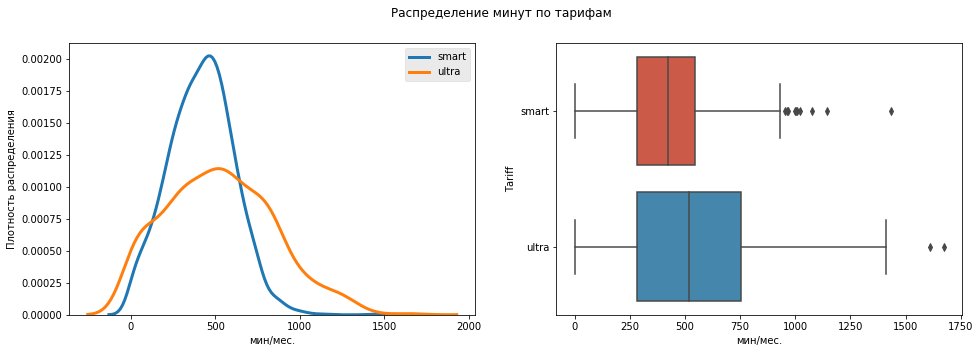

In [28]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим гистрограмму плотности по звонкам для обоих тарифов
plt.style.use  ('ggplot')
sns.distplot(df_smart['duration_calls'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Smart', ax=axes[0])

sns.distplot(df_ultra['duration_calls'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label = 'Ultra', ax=axes[0])

# Создадим график boxplot для двух тарифов во второй колонке
sns.boxplot(data=df.sort_values(by='tariff'), x='duration_calls', y='tariff', ax=axes[1])


# Добавим подписи для каждой колонки 
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('мин/мес.')
axes[0].set_ylabel('Плотность распределения')
axes[1].set_xlabel('мин/мес.')
axes[1].set_ylabel('Tariff')

# Добавим общий заголовок
fig.suptitle('Распределение минут по тарифам');

Для клиентов тарифа Смарт пик звонком приходится примерно на 500 минут. Среднее же составляет 420 минут.
Большинство клиент пытается уложится в ограничение тарифного плана в 500 минут. Потому после 500 минут идёт довольно резкое снижение.

Для клиенто тарифа Ультра нет островыраженного пика, но он находится около 550 минут. Среднее же составляет 547 минут.
Так как в тарифном плане включены 3000 минут, поэтому и нет никакого резкого снижения. Потому распределение похоже на нормальное.

In [29]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов smart по количеству СМС
mean_smart_messages = df_smart['amount_messages'].mean()
dispersion_smart_messages = np.var(df_smart['amount_messages'], ddof = 1)
std_smart_messages = np.std(df_smart['amount_messages'], ddof = 1)

# И выведем их на экран
print('Среднее количество отправленных СМС для клиента с тарифом Smart:', mean_smart_messages)
print('Дисперсия:', dispersion_smart_messages)
print('Среднее отклонение:', std_smart_messages)

Среднее количество отправленных СМС для клиента с тарифом Smart: 33.384028712427096
Дисперсия: 796.8129584480083
Среднее отклонение: 28.22787555676141


In [30]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов Ultra по количеству СМС
mean_ultra_messages = df_ultra['amount_messages'].mean()
dispersion_ultra_messages = np.var(df_ultra['amount_messages'], ddof = 1)
std_ultra_messages = np.std(df_ultra['amount_messages'], ddof = 1)

# И выведем их на экран
print('Среднее количество отправленных СМС для клиента с тарифом Ultra:', mean_ultra_messages)
print('Дисперсия:', dispersion_ultra_messages)
print('Среднее отклонение:', std_ultra_messages)

Среднее количество отправленных СМС для клиента с тарифом Ultra: 49.36345177664975
Дисперсия: 2285.2661425446736
Среднее отклонение: 47.804457350174715


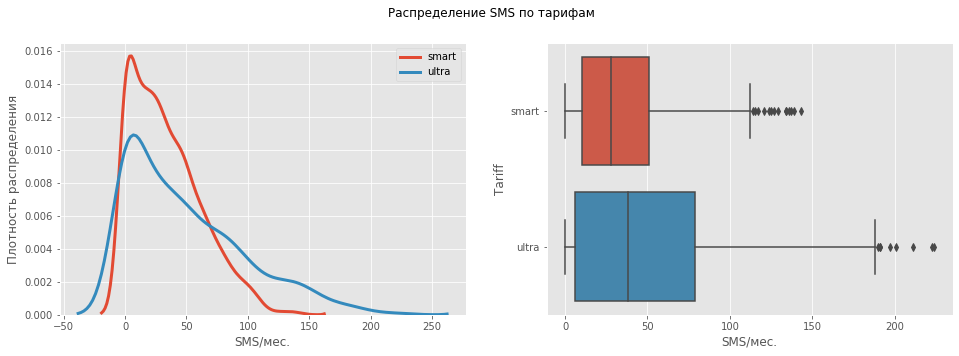

In [31]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Создадим две гистограммы для разных тарифов. 
plt.style.use  ('ggplot')
sns.distplot(df_smart['amount_messages'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Smart', ax=axes[0])

sns.distplot(df_ultra['amount_messages'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Ultra', ax=axes[0])


# Создадим график boxplot для двух тарифов во второй колонке
sns.boxplot(data=df.sort_values(by='tariff'), x='amount_messages', y='tariff', ax=axes[1])


# Добавим подписи для каждой колонки 
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('SMS/мес.')
axes[0].set_ylabel('Плотность распределения')
axes[1].set_xlabel('SMS/мес.')
axes[1].set_ylabel('Tariff')

# Добавим общий заголовок
fig.suptitle('Распределение SMS по тарифам');

Для клиентов тарифа Смарт пик СМС приходится примерно на 30 cообщений. Среднее же составляет 33 сообщений.
Большинство клиент пытается уложится в ограничение тарифного плана в 50 СМС. Пик начинает резко снижаться после 45 СМС.


Для клиенто тарифа Ультра нет островыраженного пика, но тоже находится в районе 30-40 сообщений. Среднее же составляет 49 сообщение.
Так как в тарифном плане включены 1000 СМС, поэтому и нет никакого резкого снижения. 

Сам вид данной связи не очень популярен. Потому распредения имеют вид положительной скоженности.

In [32]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов smart по интернету
mean_smart_mb = df_smart['mb_used'].mean()
dispersion_smart_mb = np.var(df_smart['mb_used'], ddof = 1)
std_smart_mb = np.std(df_smart['mb_used'], ddof = 1)

# И выведем их на экран
print('Среднее количество интернет трафика для клиента с тарифом Smart:', mean_smart_mb)
print('Дисперсия:', dispersion_smart_mb)
print('Среднее отклонение:', std_smart_mb)

Среднее количество интернет трафика для клиента с тарифом Smart: 16229.188425302826
Дисперсия: 34545911.12695753
Среднее отклонение: 5877.576977544193


In [33]:
# рассчитаем среднее количество, дисперсию и стандартное отклонение для клиентов Ultra по интернету
mean_ultra_mb = df_ultra['mb_used'].mean()
dispersion_ultra_mb = np.var(df_ultra['mb_used'], ddof = 1)
std_ultra_mb = np.std(df_ultra['mb_used'], ddof = 1)

# И выведем их на экран
print('Среднее количество интернет трафика для клиента с тарифом Ultra:', mean_ultra_mb)
print('Дисперсия:', dispersion_ultra_mb)
print('Среднее отклонение:', std_ultra_mb)

Среднее количество интернет трафика для клиента с тарифом Ultra: 19486.90152284264
Дисперсия: 101935621.04821923
Среднее отклонение: 10096.317202238608


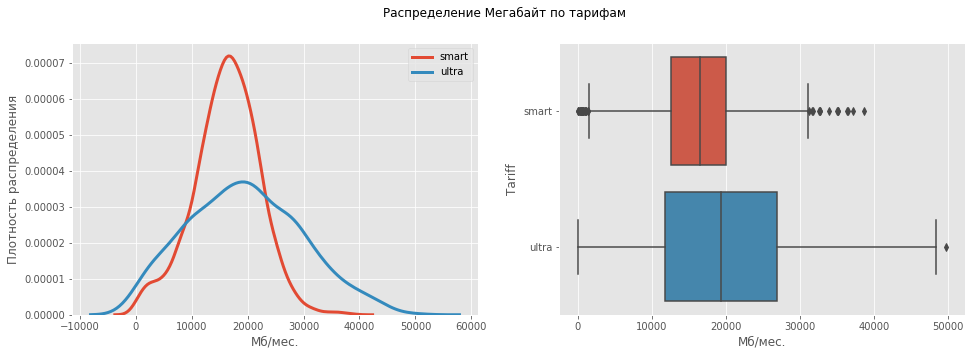

In [34]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Построим гистрограмму плотности по интернет трафику для обоих тарифов
plt.style.use  ('ggplot')
sns.distplot(df_smart['mb_used'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Smart', ax=axes[0])

sns.distplot(df_ultra['mb_used'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = 'Ultra', ax=axes[0])

# Создадим график boxplot для двух тарифов во второй колонке
sns.boxplot(data=df.sort_values(by='tariff'), x='mb_used', y='tariff', ax=axes[1])

# Добавим подписи для каждой колонки 
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('Мб/мес.')
axes[0].set_ylabel('Плотность распределения')
axes[1].set_xlabel('Мб/мес.')
axes[1].set_ylabel('Tariff')

# Добавим общий заголовок
fig.suptitle('Распределение Мегабайт по тарифам');

Для клиентов тарифа Смарт пик интернет трафика приходится примерно на 17000 мегабайт. Среднее же составляет 16230 мегабайт.
Большинство клиент пытается уложится в ограничение тарифного плана в 15360 мегабайт. Но этого явно мало. Так что снижение начинается только около 19 гигабайт.

Для клиенто тарифа Ультра нет островыраженного пика, но он находится около 20 гигабай. Среднее же составляет 19486 мегабайт.
Так как в тарифном плане включены 30720 мегабайт (большинство клиентов в него попадают), поэтому и нет никакого резкого снижения. Потому распределение похоже на нормальное.

### Вывод

В среднем для клиентов обоих тарифов идёт одинаковая потребность в длительности звонков, СМС и интернет трафике.
Средняя продолжительность звонков помесячно составляет около 500 минут.
Среднее количество использованных СМС составляет примерно 30-40 СМС.
Среднее количество используемого интернет трафика составляет около 16 Гигабайт у тарифов смарт и 19 у тарифов ультра.

Есть только разное поведение клиентов, т.к. у клиентов тарифа смарт пакет услуг меньше, то после привышения или около этой цифры идёт резкое снижение пользователей данных услуг. Чтобы съэкономить деньги.

Клиенты тарифе Ультра не имеют резких пиков и снижений в использовании услуг, потому имеют более платное движение и больше похожи на нормальное распределение.

## Шаг 4. Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Нулевая гипотеза звучит так: средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадают.

Альтернативная: что они отличаются.

In [35]:
# Выведем на экран среднюю выручку тарифов Смарт и Ультра.
print('cредняя выручка тарифов Smart: ', df_smart['expenses_month'].mean())
print('cредняя выручка тарифов Ultra: ', df_ultra['expenses_month'].mean())

alpha = 0.05
results = st.ttest_ind(df_smart['expenses_month'], df_ultra['expenses_month']) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредняя выручка тарифов Smart:  1294.6393001345896
cредняя выручка тарифов Ultra:  2071.0659898477156
p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


#### Вывод

Раз нулевая гипотеза с формулировкой, что средняя выручка пользователей разных тарифов равна, опроверглась.
Выходит, что средняя выручка пользоватлей отличается. 
В сторону клиентов тарифа Ультра. У них выручка в среднем на 800 рублей выше, чем у клиентов тарифа Смарт.

Мы не можем отвергнуть нашу гипотезу по данной выборке.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза звучит так: средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов.

Альтернативная: что они отличаются.

In [36]:
# Создадим новые таблицы
# Для клиентов из Москвы
df_moscow  = df[df['city'] == 'Москва']

# Для клиентов из остальных городов
df_cities  = df[df['city'] != 'Москва']

In [37]:
# Выведем на экран среднюю выручку клиентов из Москвы и из остальных городов.
print('cредняя выручка по клиетам из Москвы: ', df_moscow['expenses_month'].mean())
print('cредняя выручка по клиентам из остальных городам: ', df_cities['expenses_month'].mean())

alpha = 0.05
results = st.ttest_ind(df_moscow['expenses_month'], df_cities['expenses_month']) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредняя выручка по клиетам из Москвы:  1550.8052373158755
cредняя выручка по клиентам из остальных городам:  1528.3169419900116
p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Мы не смогли отвергнуть нашу нулевую теорию, выходит, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Разница всего около 2х процентов.

### Вывод

По данной нам выборке мы не смогли опровергнуть гипотезу:

 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
 
Но опровергли гипотезу:

 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Шаг 5. Общий вывод

В данной работе мы рассмотрели выборку из 500 клиентов за 2018 год.
Добавили новых расчётов:

 - Помесячное количество использованных минут для каждого клиента
 - Помесячное количество использованных СМС для каждого клиента
 - Помесячное количество использованных мегабайт для каждого клиента
 - Помесячную выручку с каждого клиента
 
Рассмотрели через гистограммы использование минут разговора, СМС и интернет трафика для клиентов каждого из двух тарифов:
Что для клиентво Смарт, что для клиентов Ультра идёт примерно одинаковые использование, что минут разговора, что СМС.
Средняя продолжительность звонков помесячно составляет около 500 минут.
Среднее количество использованных СМС составляет примерно 30-40 СМС.

Есть небольшая разница в использования трафика интернета:
У тарифо Смарт - это 16 гигабайт, у тарифов Ультра - 19 гигабайт.

Но из-за того, что у клиентов тарифа Смарт пакет услуг меньше, то при приближении к предельно допустимому бесплатному использованию, идёт резкое снижение.

Клиенты тарифов Ультра не имеют таких резких пиков и снижений в использовании услуг, потому имеют более платное движение и больше похожи на нормальное распределение. 
 
Также проверили две гипотезы.
Гипотезу:

 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
 
Мы опровергли, выручка не сильно отличается:

 1) Средняя выручка по клиетам из Москвы:  1550
 
 2) Средняя выручка по клиентам из остальных городам:  1528
 
Клиенты из Москвы тратят на услуги связи примерно на 2% больше по данной выборке.

Гипотезу:

 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Мы не можем опровергнуть, ведь:
 
 1) Средняя выручка тарифов Smart:  1295
 
 2) Средняя выручка тарифов Ultra:  2071

Потому для компании наибольшую ценность состаляет тариф Ультра.